           Date        Open         High         Low       Close    Volume
0    02-01-2025  243.263199   248.500565  241.238085  248.330961  55740700
1    03-01-2025  242.774368   243.592387  241.307905  242.774368  40244100
2    06-01-2025  244.410416   246.734810  242.614744  243.722074  45045600
3    07-01-2025  241.627136   244.959095  240.769205  242.395272  40856000
4    08-01-2025  242.115951   243.123531  239.472335  241.337830  37628900
..          ...         ...          ...         ...         ...       ...
98   27-05-2025  200.210007   200.740005  197.429993  198.300003  56288500
99   28-05-2025  200.419998  1013.649979   39.979999  200.589996  45339700
100  29-05-2025  199.949997   203.809998  198.509995  203.580002  51396800
101  30-05-2025  200.850006   201.960007  196.779999  199.369995  70819900
102  02-06-2025  201.699997   202.130005  200.119995  200.279999  35343100

[103 rows x 6 columns]
Date      0
Open      5
High      0
Low       0
Close     5
Volume    0
dtyp

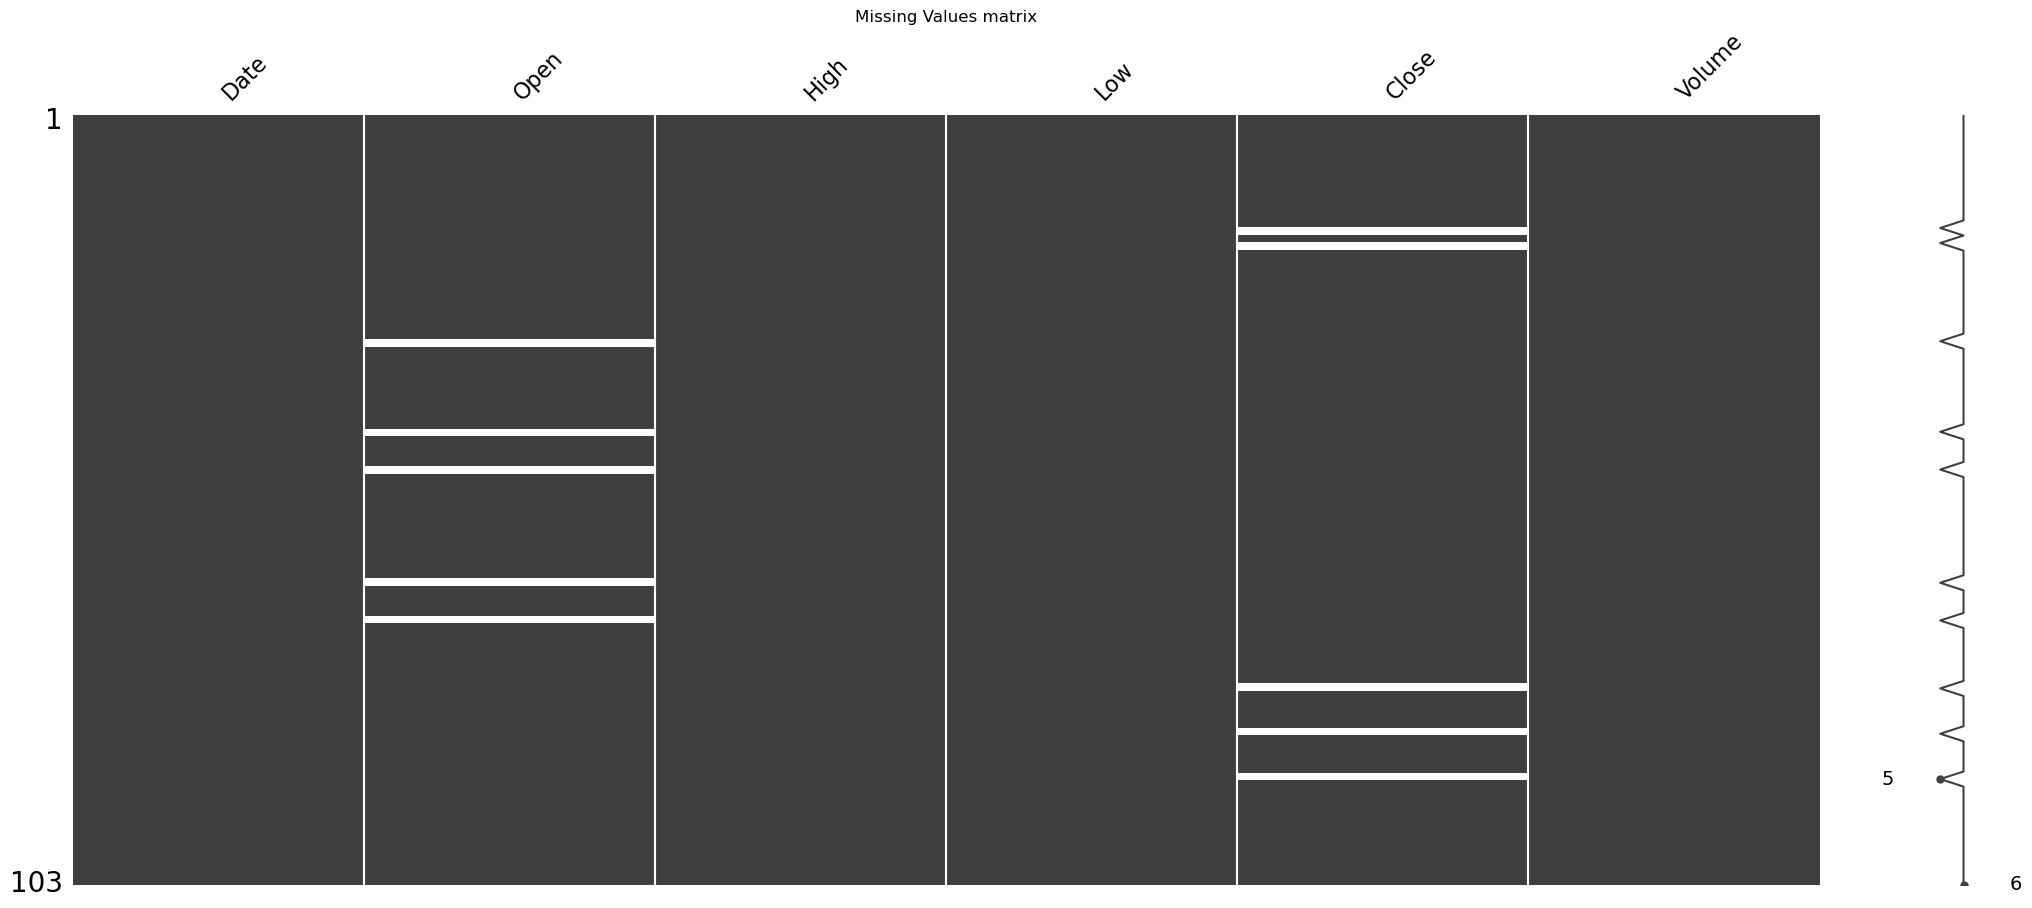


Values after replacing with median:
 0      243.263199
1      242.774368
2      244.410416
3      241.627136
4      242.115951
          ...    
98     200.210007
99     200.419998
100    199.949997
101    200.850006
102    201.699997
Name: Open, Length: 103, dtype: float64

Values after replacing with mean:
 0      248.330961
1      242.774368
2      243.722074
3      242.395272
4      241.337830
          ...    
98     198.300003
99     200.589996
100    203.580002
101    199.369995
102    200.279999
Name: Close, Length: 103, dtype: float64

columns afer replacing missing values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


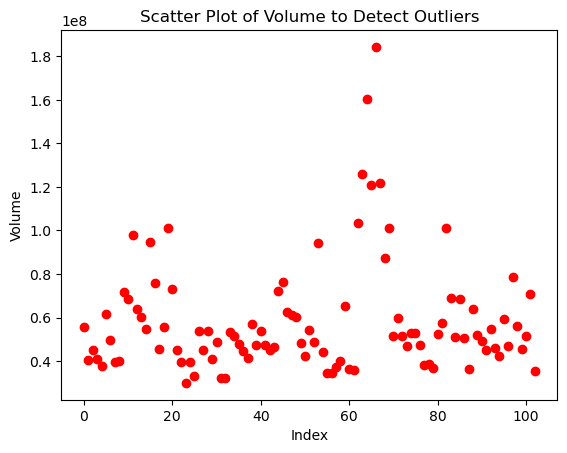

Number of outliers: 4


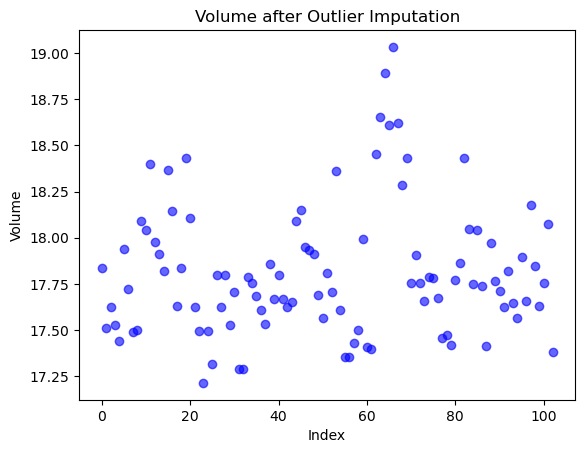

          Close  Next_Close  Label
99   200.589996  203.580002      1
13   224.199183  224.239068      1
101  199.369995  200.279999      1
96   200.710007  193.669998      0
1    242.774368  243.722074      1
97   193.669998  198.300003      1
58   221.379691  216.725791      0
82   219.054593  202.834025      0
51   213.939446  213.709754      0
74   195.863155  205.730222      1
Accuracy for Logistic regression: 0.6190476190476191
Precision for Logistic regression: 0.5
Recall for Logistic regression: 0.5


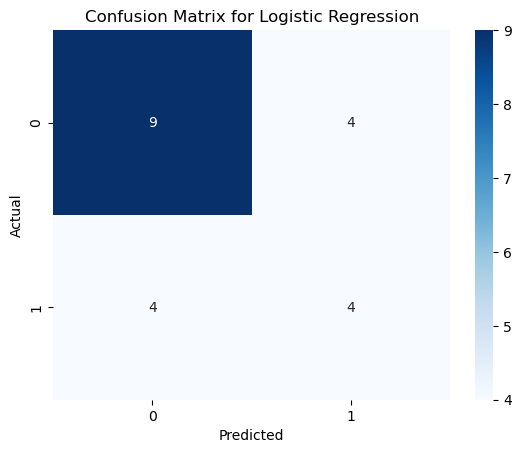

Accuracy for Random Forest: 0.5238095238095238
Precision for Random Forest: 0.3333333333333333
Recall for Random Forest: 0.25


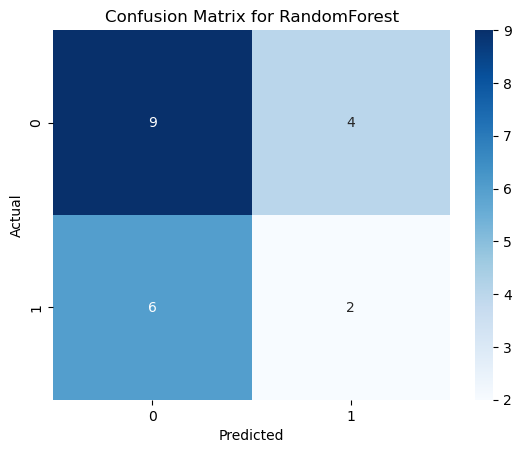

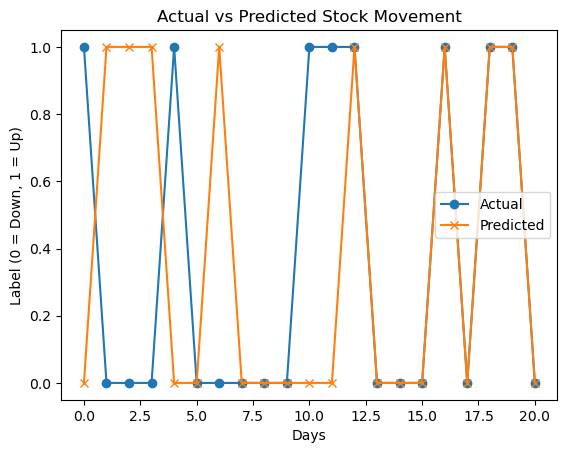

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df=pd.read_csv(r"C:\Users\IM_HOME\Desktop\intern\stockmarket.csv")
print(df)

#checking the missing values in the column
print(df.isnull().sum())

#Visualizing the missing values through MatrixPlot
import missingno as ms
ms.matrix(df)
plt.title("Missing Values matrix")
plt.show()

#Handling missing values through mean and median
df['Open']=df['Open'].fillna(df['Open'].median())
print("\nValues after replacing with median:\n",df['Open'])

df['Close']=df['Close'].fillna(df['Close'].mean())
print("\nValues after replacing with mean:\n",df['Close'])

#check for missing after replacing
print("\ncolumns afer replacing missing values:\n",df.isnull().sum())

#visualize Outliers through scatterplot
plt.scatter(df.index, df['Volume'], color='red')
plt.title("Scatter Plot of Volume to Detect Outliers")
plt.xlabel("Index")
plt.ylabel("Volume")
plt.show()

#Detect the Outliers
upper_limit = df['Volume'].quantile(0.99)
lower_limit = df['Volume'].quantile(0.01)

outliers = (df['Volume'] < lower_limit) | (df['Volume'] > upper_limit)
print("Number of outliers:", outliers.sum())

#log transformation
import numpy as np
df['Volume_log'] = np.log1p(df['Volume'])  

plt.scatter(df.index, df['Volume_log'], color='blue', alpha=0.6)
plt.title("Volume after Outlier Imputation")
plt.xlabel("Index")
plt.ylabel("Volume")
plt.show()

#create nextclose
df['Next_Close'] = df['Close'].shift(-1) # next day’s closing price
df.dropna(subset=['Next_Close'], inplace=True)


#create target and see the changes with random rows
df['Label'] = (df['Next_Close'] > df['Close']).astype(int)
print(df[['Close', 'Next_Close', 'Label']].sample(10))

#select features and target
x = df[['Open','High','Low','Close','Volume_log']]
y=df['Label']

#Normalize/scale features using StandardScaler
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x_sca=sca.fit_transform(x)

#Train-test-split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sca, y, test_size=0.2, random_state=42)  # shuffle=False for time-series

#Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

#Predicting
y_pred = model.predict(x_test)

#Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
print("Accuracy for Logistic regression:", accuracy_score(y_test, y_pred))
print("Precision for Logistic regression:", precision_score(y_test, y_pred))
print("Recall for Logistic regression:", recall_score(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#Train RandomForest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict
y_pred1 = rf_model.predict(x_test)

# Evaluate
print("Accuracy for Random Forest:", accuracy_score(y_test, y_pred1))
print("Precision for Random Forest:", precision_score(y_test, y_pred1))
print("Recall for Random Forest:", recall_score(y_test, y_pred1))

cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForest')
plt.show()


#Visualize predictions vs actual outcomes in a plot
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted Stock Movement")
plt.xlabel("Days")
plt.ylabel("Label (0 = Down, 1 = Up)")
plt.legend()
plt.show()